In [1]:
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import os
import gmaps
gmaps.configure(api_key=os.environ['GMAPS_KEY'])
from PIL import Image

### Create dataframe for use in Widgets Map

In [16]:
df_list = pd.read_csv('Midland_listings.csv')
df1 = df_list[['listing.user.id','listing.lat', 'listing.lng']]
df2 = df1.groupby('listing.user.id').count()
l3 = df2[df2['listing.lat']>2].index.tolist()
d = {listing: pd.DataFrame(df1.loc[df1['listing.user.id'] == listing]).reset_index(drop=True) for listing in l3}
df_map = pd.concat(d[l3[x]] for x in range(23))
df_map['listing.user.id'] = df_map['listing.user.id'].apply(str)
df_map.to_csv('Prominent_Hosts.csv', index=False)

### Widgets GMAP (Hosts with more than two listings)

In [2]:
class OutletExplorer(object):

  def __init__(self, df):
      """
      Jupyter widget for exploring Airbnb listings by Host ID

      Using checkboxes, the user chooses which Host ID's to include
      in the map.
      """
      self._df = df
      self._symbol_layer = None

      self._host_0_symbols = self._create_symbols_for_host(
          '450856', 'rgba(20, 20, 20, 0.8)')
      self._host_1_symbols = self._create_symbols_for_host(
          '11656777', 'rgba(120, 120, 120, 0.8)')
      self._host_2_symbols = self._create_symbols_for_host(
          '13387627', 'rgba(180, 180, 180, 0.8)')
      self._host_3_symbols = self._create_symbols_for_host(
          '13604215', 'rgba(240, 240, 240, 0.8)')
      self._host_4_symbols = self._create_symbols_for_host(
          '24951414', 'rgba(255, 255, 255, 0.8)')
      self._host_5_symbols = self._create_symbols_for_host(
          '28980408', 'rgba(255, 0, 0, 0.8)')
      self._host_6_symbols = self._create_symbols_for_host(
          '41669328', 'rgba(0, 200, 0, 0.8)')
      self._host_7_symbols = self._create_symbols_for_host(
          '41916063', 'rgba(0, 0, 255, 0.8)')
      self._host_8_symbols = self._create_symbols_for_host(
          '77533936', 'rgba(255, 165, 0, 0.8)')
      self._host_9_symbols = self._create_symbols_for_host(
          '143346325', 'rgba(230, 130, 230, 0.8)')
      self._host_10_symbols = self._create_symbols_for_host(
          '149309678', 'rgba(100, 90, 200, 0.8)')
      self._host_11_symbols = self._create_symbols_for_host(
          '153682556', 'rgba(255, 120, 0, 0.8)')
      self._host_12_symbols = self._create_symbols_for_host(
          '174750939', 'rgba(255, 120, 120, 0.8)')
      self._host_13_symbols = self._create_symbols_for_host(
          '184109707', 'rgba(0, 120, 120, 0.8)')
      self._host_14_symbols = self._create_symbols_for_host(
          '207888136', 'rgba(0, 0, 120, 0.8)')
      self._host_15_symbols = self._create_symbols_for_host(
          '210949544', 'rgba(120, 0, 120, 0.8)')
      self._host_16_symbols = self._create_symbols_for_host(
          '224560380', 'rgba(120, 0, 255, 0.8)')
      self._host_17_symbols = self._create_symbols_for_host(
          '250352128', 'rgba(120, 255, 255, 0.8)')
      self._host_18_symbols = self._create_symbols_for_host(
          '258887301', 'rgba(255, 255, 0, 0.8)')
      self._host_19_symbols = self._create_symbols_for_host(
          '264055558', 'rgba(255, 255, 150, 0.8)')
      self._host_20_symbols = self._create_symbols_for_host(
          '266063094', 'rgba(150, 200, 200, 0.8)')
      self._host_21_symbols = self._create_symbols_for_host(
          '302762155', 'rgba(60, 179, 113, 0.8)')
      self._host_22_symbols = self._create_symbols_for_host(
          '342643084', 'rgba(255, 200, 30, 0.8)')



      title_widget = widgets.HTML(
          '<h3>Explore Airbnb Listings by Host ID</h3>'
          '<h4>Data from <a href="http://airbnb.com">Airbnb Midland, TX</a></h4>'
      )
      controls = self._render_controls(True, True, True, True, True, True, True, True, True, True, True, True, 
                                      True, True, True, True, True, True, True, True, True, True, True
                                      )
      map_figure = self._render_map(True, True, True, True, True, True, True, True, True, True, True, True, 
                                      True, True, True, True, True, True, True, True, True, True, True
                                   )
      self._container = widgets.VBox(
          [title_widget, controls, map_figure])

  def render(self):
      """ Render the widget """
      display(self._container)

  def _render_map(self, 
                 initial_include_host_0, initial_include_host_1, initial_include_host_2, initial_include_host_3, 
                 initial_include_host_4, initial_include_host_5, initial_include_host_6, initial_include_host_7, 
                 initial_include_host_8, initial_include_host_9, initial_include_host_10, initial_include_host_11, 
                 initial_include_host_12, initial_include_host_13, initial_include_host_14, initial_include_host_15, 
                 initial_include_host_16, initial_include_host_17, initial_include_host_18, initial_include_host_19, 
                 initial_include_host_20, initial_include_host_21, initial_include_host_22
                 ):
      """ Render the initial map """
      fig = gmaps.figure(layout={'height': '500px'})
      symbols = self._generate_symbols(True, True, True, True, True, True, True, True, True, True, True, True, 
                                      True, True, True, True, True, True, True, True, True, True, True
                                      )
      self._symbol_layer = gmaps.Markers(markers=symbols)
      fig.add_layer(self._symbol_layer)
      return fig

  def _render_controls(
      self,
      initial_include_host_0, 
      initial_include_host_1, 
      initial_include_host_2, 
      initial_include_host_3, 
      initial_include_host_4, 
      initial_include_host_5, 
      initial_include_host_6, 
      initial_include_host_7, 
      initial_include_host_8, 
      initial_include_host_9, 
      initial_include_host_10, 
      initial_include_host_11, 
      initial_include_host_12, 
      initial_include_host_13, 
      initial_include_host_14, 
      initial_include_host_15, 
      initial_include_host_16, 
      initial_include_host_17, 
      initial_include_host_18, 
      initial_include_host_19, 
      initial_include_host_20, 
      initial_include_host_21, 
      initial_include_host_22
  ):
      """ Render the checkboxes """
      self._host_0_checkbox = widgets.Checkbox(
          value=initial_include_host_0,
          description='450856'
      )
      self._host_1_checkbox = widgets.Checkbox(
          value=initial_include_host_1,
          description='11656777'
      )
      self._host_2_checkbox = widgets.Checkbox(
          value=initial_include_host_2,
          description='13387627'
      )
      self._host_3_checkbox = widgets.Checkbox(
          value=initial_include_host_3,
          description='13604215'
      )
      self._host_4_checkbox = widgets.Checkbox(
          value=initial_include_host_4,
          description='24951414'
      )
      self._host_5_checkbox = widgets.Checkbox(
          value=initial_include_host_5,
          description='28980408'
      )
      self._host_6_checkbox = widgets.Checkbox(
          value=initial_include_host_6,
          description='41669328'
      )
      self._host_7_checkbox = widgets.Checkbox(
          value=initial_include_host_7,
          description='41916063'
      )
      self._host_8_checkbox = widgets.Checkbox(
          value=initial_include_host_8,
          description='77533936'
      )
      self._host_9_checkbox = widgets.Checkbox(
          value=initial_include_host_9,
          description='143346325'
      )
      self._host_10_checkbox = widgets.Checkbox(
          value=initial_include_host_10,
          description='149309678'
      )
      self._host_11_checkbox = widgets.Checkbox(
          value=initial_include_host_11,
          description='153682556'
      )
      self._host_12_checkbox = widgets.Checkbox(
          value=initial_include_host_12,
          description='174750939'
      )
      self._host_13_checkbox = widgets.Checkbox(
          value=initial_include_host_13,
          description='184109707'
      )
      self._host_14_checkbox = widgets.Checkbox(
          value=initial_include_host_14,
          description='207888136'
      )
      self._host_15_checkbox = widgets.Checkbox(
          value=initial_include_host_15,
          description='210949544'
      )
      self._host_16_checkbox = widgets.Checkbox(
          value=initial_include_host_16,
          description='224560380'
      )
      self._host_17_checkbox = widgets.Checkbox(
          value=initial_include_host_17,
          description='250352128'
      )
      self._host_18_checkbox = widgets.Checkbox(
          value=initial_include_host_18,
          description='258887301'
      )
      self._host_19_checkbox = widgets.Checkbox(
          value=initial_include_host_19,
          description='264055558'
      )
      self._host_20_checkbox = widgets.Checkbox(
          value=initial_include_host_20,
          description='266063094'
      )
      self._host_21_checkbox = widgets.Checkbox(
          value=initial_include_host_21,
          description='302762155'
      )
      self._host_22_checkbox = widgets.Checkbox(
          value=initial_include_host_22,
          description='342643084'
      )
      self._host_0_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_1_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_2_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_3_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_4_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_5_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_6_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_7_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_8_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_9_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_10_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_11_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_12_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_13_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_14_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_15_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_16_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_17_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_18_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_19_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_20_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_21_checkbox.observe(
          self._on_controls_change, names='value')
      self._host_22_checkbox.observe(
          self._on_controls_change, names='value')
      controls = widgets.VBox(
          [self._host_0_checkbox, self._host_1_checkbox, self._host_2_checkbox, self._host_3_checkbox, 
          self._host_4_checkbox, self._host_5_checkbox, self._host_6_checkbox, self._host_7_checkbox,
          self._host_8_checkbox, self._host_9_checkbox, self._host_10_checkbox, self._host_11_checkbox,
          self._host_12_checkbox, self._host_13_checkbox, self._host_14_checkbox, self._host_15_checkbox,
          self._host_16_checkbox, self._host_17_checkbox, self._host_18_checkbox, self._host_19_checkbox,
          self._host_20_checkbox, self._host_21_checkbox, self._host_22_checkbox
          ])
      return controls

  def _on_controls_change(self, obj):
      """
      Called when the checkboxes change

      This method builds the list of symbols to include on the map,
      based on the current checkbox values. It then updates the
      symbol layer with the new symbol list.
      """
      include_host_0 = self._host_0_checkbox.value
      include_host_1 = self._host_1_checkbox.value
      include_host_2 = self._host_2_checkbox.value
      include_host_3 = self._host_3_checkbox.value
      include_host_4 = self._host_4_checkbox.value
      include_host_5 = self._host_5_checkbox.value
      include_host_6 = self._host_6_checkbox.value
      include_host_7 = self._host_7_checkbox.value
      include_host_8 = self._host_8_checkbox.value
      include_host_9 = self._host_9_checkbox.value
      include_host_10 = self._host_10_checkbox.value
      include_host_11 = self._host_11_checkbox.value
      include_host_12 = self._host_12_checkbox.value
      include_host_13 = self._host_13_checkbox.value
      include_host_14 = self._host_14_checkbox.value
      include_host_15 = self._host_15_checkbox.value
      include_host_16 = self._host_16_checkbox.value
      include_host_17 = self._host_17_checkbox.value
      include_host_18 = self._host_18_checkbox.value
      include_host_19 = self._host_19_checkbox.value
      include_host_20 = self._host_20_checkbox.value
      include_host_21 = self._host_21_checkbox.value
      include_host_22 = self._host_22_checkbox.value
      symbols = self._generate_symbols(
          include_host_0, include_host_1, include_host_2, include_host_3, 
          include_host_4, include_host_5, include_host_6, include_host_7, 
          include_host_8, include_host_9, include_host_10, include_host_11,
          include_host_12, include_host_13, include_host_14, include_host_15,
          include_host_16, include_host_17, include_host_18, include_host_19,
          include_host_20, include_host_21, include_host_22
      )
      # Update the layer with the new symbols:
      self._symbol_layer.markers = symbols

  def _generate_symbols(self, include_host_0, include_host_1, include_host_2, include_host_3, 
          include_host_4, include_host_5, include_host_6, include_host_7, 
          include_host_8, include_host_9, include_host_10, include_host_11,
          include_host_12, include_host_13, include_host_14, include_host_15,
          include_host_16, include_host_17, include_host_18, include_host_19,
          include_host_20, include_host_21, include_host_22
                       ):
      """ Generate the list of symbols to include """
      symbols = []
      if include_host_0:
          symbols.extend(self._host_0_symbols)
      if include_host_1:
          symbols.extend(self._host_1_symbols)
      if include_host_2:
          symbols.extend(self._host_2_symbols)
      if include_host_3:
          symbols.extend(self._host_3_symbols)
      if include_host_4:
          symbols.extend(self._host_4_symbols)
      if include_host_5:
          symbols.extend(self._host_5_symbols)
      if include_host_6:
          symbols.extend(self._host_6_symbols)
      if include_host_7:
          symbols.extend(self._host_7_symbols)
      if include_host_8:
          symbols.extend(self._host_8_symbols)
      if include_host_9:
          symbols.extend(self._host_9_symbols)
      if include_host_10:
          symbols.extend(self._host_10_symbols)
      if include_host_11:
          symbols.extend(self._host_11_symbols)
      if include_host_12:
          symbols.extend(self._host_12_symbols)
      if include_host_13:
          symbols.extend(self._host_13_symbols)
      if include_host_14:
          symbols.extend(self._host_14_symbols)
      if include_host_15:
          symbols.extend(self._host_15_symbols)
      if include_host_16:
          symbols.extend(self._host_16_symbols)
      if include_host_17:
          symbols.extend(self._host_17_symbols)
      if include_host_18:
          symbols.extend(self._host_18_symbols)
      if include_host_19:
          symbols.extend(self._host_19_symbols)
      if include_host_20:
          symbols.extend(self._host_20_symbols)
      if include_host_21:
          symbols.extend(self._host_21_symbols)
      if include_host_22:
          symbols.extend(self._host_22_symbols)
      return symbols

  def _create_symbols_for_host(self, host, color):
      host_df = self._df[self._df['listing.user.id'] == host]
      symbols = [
          gmaps.Symbol(
              location=(latitude, longitude),
              stroke_color=color,
              fill_color=color,
              scale=2
          )
          for latitude, longitude in
          zip(host_df['listing.lat'], host_df['listing.lng'])
      ]
      return symbols


df = pd.read_csv('Prominent_Hosts.csv')
df['listing.user.id'] = df['listing.user.id'].apply(str)
OutletExplorer(df).render()

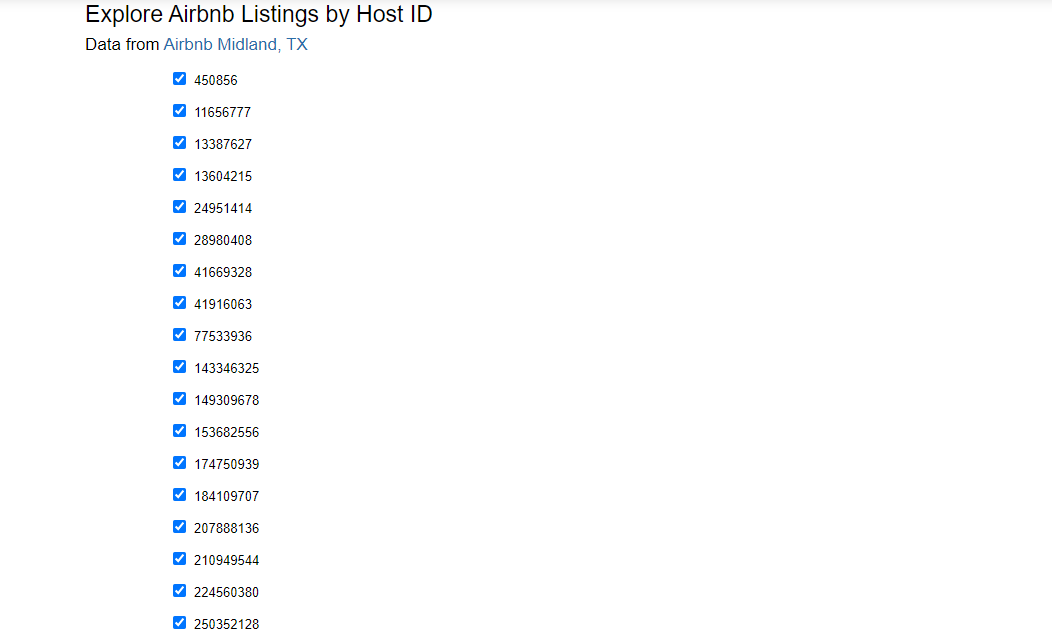

In [4]:
img_h1 = Image.open('Hosts_1.png')
img_h1

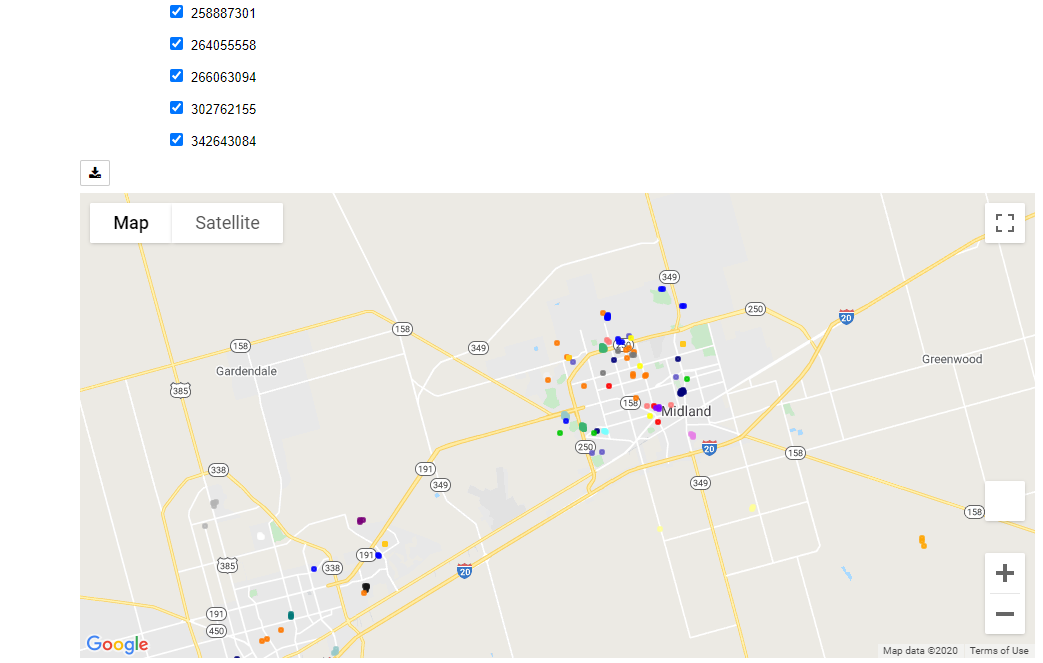

In [5]:
img_h2 = Image.open('Hosts_gmap_2.png')
img_h2